<a href="https://colab.research.google.com/github/abhaswanchu1/mids-281-final-project-cars/blob/Abhas-Work/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
##############################################################################################
########################  Load Images  ########################################################
##############################################################################################
# Load the train and test data
X_train_pca = np.load(r"drive/MyDrive/X.npy")
X_test_pca = np.load(r"drive/MyDrive/X_test.npy")
Y_train = np.load(r"drive/MyDrive/targets.npy")
Y_test = np.load(r"drive/MyDrive/test_targets.npy")
X_train = np.load(r'drive/MyDrive/stacked_features.npy')
X_test = np.load(r'drive/MyDrive/stacked_features_test.npy')


##SVM with PCA Feature Set

In [2]:
import time

In [3]:
# 1. Create and Train the SVM Model
svm_model_pca = SVC(probability=True)  # probability=True for ROC AUC calculation
start_time = time.time()
svm_model_pca.fit(X_train_pca, Y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 377.45613050460815 seconds


In [4]:
Y_pred_train = svm_model_pca.predict(X_train_pca)
class_names = ['Audi', 'BMW', 'Cheverolet', 'Dodge']

Accuracy: 0.8275
Precision: 0.8582
Recall: 0.8275
Weighted F1-Score: 0.8275


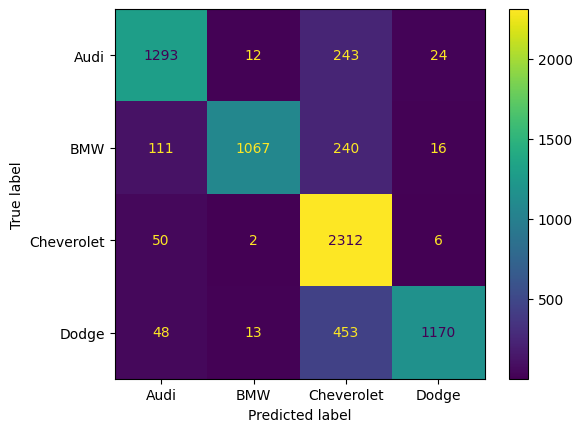

In [6]:
accuracy = accuracy_score(Y_train, Y_pred_train)
precision = precision_score(Y_train, Y_pred_train, average='weighted') # average='weighted' for multi-class classification
recall = recall_score(Y_train, Y_pred_train, average='weighted')
f1 = f1_score(Y_train, Y_pred_train, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Weighted F1-Score: {f1:.4f}")
cm = confusion_matrix(Y_train, Y_pred_train)

# Use ConfusionMatrixDisplay for a better visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = class_names)
disp.plot()
plt.show()

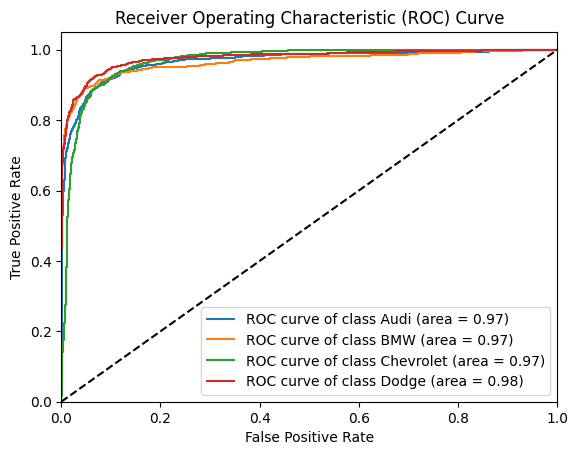

In [7]:
# Binarize the target labels for multi-class ROC AUC calculation
Y_train_bin = label_binarize(Y_train, classes=np.unique(Y_train))
n_classes = Y_train_bin.shape[1]

# Get predicted probabilities for each class
Y_prob_train = svm_model_pca.predict_proba(X_train_pca)


# Calculate and plot ROC curve for each class
plt.figure()
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_train_bin[:, i], Y_prob_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {np.unique(Y_test)[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.4491
Precision: 0.4725
Recall: 0.4491
Weighted F1-Score: 0.4109


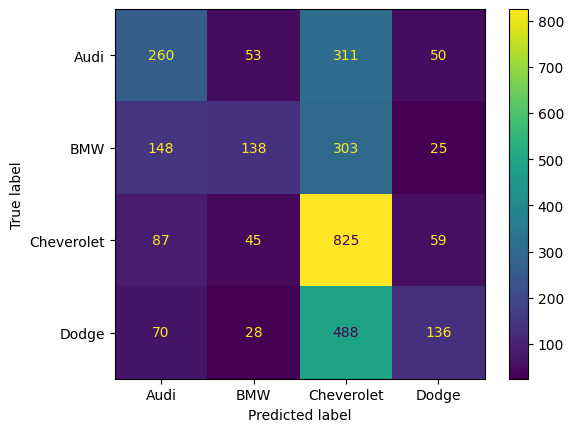

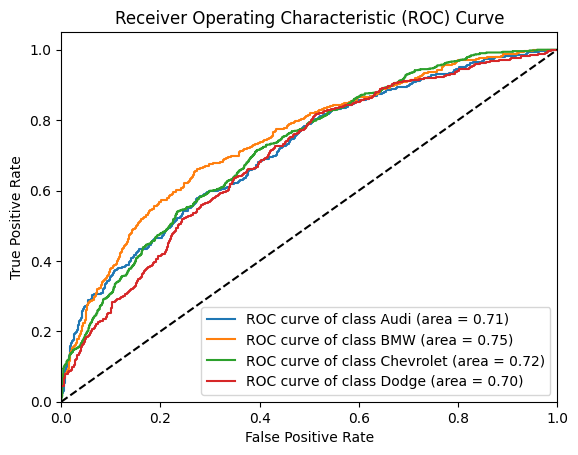

In [9]:
# Predict on the test set
Y_pred = svm_model_pca.predict(X_test_pca)

# Calculate classification metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Weighted F1-Score: {f1:.4f}")

# Display the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = class_names)
disp.plot()
plt.show()

# Binarize the target labels for multi-class ROC AUC calculation
Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
n_classes = Y_test_bin.shape[1]

# Get predicted probabilities for each class
Y_prob = svm_model_pca.predict_proba(X_test_pca)

# Calculate and plot ROC curve for each class
plt.figure()
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(np.unique(Y_test)[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#SVM with Full Feature Set

In [ ]:
# 1. Create and Train the SVM Model
svm_model = SVC(probability=True)  # probability=True for ROC AUC calculation
start_time = time.time()
svm_model.fit(X_train, Y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")
# 2. Predict on the training set
Y_pred_train = svm_model.predict(X_train)

# 3. Calculate classification metrics for training set
accuracy = accuracy_score(Y_train, Y_pred_train)
precision = precision_score(Y_train, Y_pred_train, average='weighted')
recall = recall_score(Y_train, Y_pred_train, average='weighted')
f1 = f1_score(Y_train, Y_pred_train, average='weighted')

# 4. Print the metrics for training set
print(f"Training Accuracy: {accuracy:.4f}")
print(f"Training Precision: {precision:.4f}")
print(f"Training Recall: {recall:.4f}")
print(f"Training Weighted F1-Score: {f1:.4f}")

# 5. Display the confusion matrix for training set
cm = confusion_matrix(Y_train, Y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = class_names)
disp.plot()
plt.title('Confusion Matrix for Training Set')
plt.show()

#Plot ROC Curve for Training set
Y_train_bin = label_binarize(Y_train, classes=np.unique(Y_train))
n_classes = Y_train_bin.shape[1]
Y_prob_train = svm_model.predict_proba(X_train)

plt.figure()
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()
for i in range(n_classes):
    fpr_train[i], tpr_train[i], _ = roc_curve(Y_train_bin[:, i], Y_prob_train[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])
    plt.plot(fpr_train[i], tpr_train[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(np.unique(Y_train)[i], roc_auc_train[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Training Set)')
plt.legend(loc="lower right")
plt.show()
# 6. Predict on the test set
Y_pred_test = svm_model.predict(X_test)

# 7. Calculate classification metrics for test set
accuracy = accuracy_score(Y_test, Y_pred_test)
precision = precision_score(Y_test, Y_pred_test, average='weighted')
recall = recall_score(Y_test, Y_pred_test, average='weighted')
f1 = f1_score(Y_test, Y_pred_test, average='weighted')

# 8. Print the metrics for test set
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test Weighted F1-Score: {f1:.4f}")

# 9. Display the confusion matrix for test set
cm = confusion_matrix(Y_test, Y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = class_names)
disp.plot()
plt.title('Confusion Matrix for Test Set')
plt.show()

# 10. Binarize the target labels for multi-class ROC AUC calculation
Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
n_classes = Y_test_bin.shape[1]

# 11. Get predicted probabilities for each class
Y_prob = svm_model.predict_proba(X_test)

# 12. Calculate and plot ROC curve for each class
plt.figure()
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(np.unique(Y_test)[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()